In [1]:
import pandas as pd

!pip install openpyxl

In [2]:
go = pd.read_excel("./뉴스학습_원시데이터_14000개.xlsx")


In [3]:
go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         14004 non-null  int64 
 1   제목                 14004 non-null  object
 2   키워드                14001 non-null  object
 3   특성추출(가중치순 상위 50개)  14001 non-null  object
 4   본문                 14004 non-null  object
 5   URL                14004 non-null  object
 6   label              14004 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 766.0+ KB


In [4]:
title = pd.concat([go["제목"], go["label"]], axis= 1)
keyword = pd.concat([go["키워드"], go["label"]], axis= 1)
feature = pd.concat([go["특성추출(가중치순 상위 50개)"], go["label"]], axis= 1)
main_text = pd.concat([go["본문"], go["label"]], axis= 1)

---
---
---
--- 
# 뉴스 키워드 기반 - 랜덤포레스트 모델

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
# 결측값을 빈 문자열로 대체하여 오류 해결
keyword['키워드'] = keyword['키워드'].fillna('')

# tfidfvectorizer 수행 
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(keyword["키워드"])
y = keyword["label"]
# Train데이터와 Test데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state=44)

# 랜덤 포레스트 모델 생성

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# 성능평가 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
print("뉴스 keyword기반 랜덤 포레스트 모델 점수")
print(f"Accuarcy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

 - 뉴스 keyword기반 랜덤 포레스트 모델 점수 - 
Accuarcy : 0.83
precision : 0.84
recall : 0.93
F1-score : 0.88


# 뉴스 본문 기반 랜덤포레스트 모델 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
# 결측값을 빈 문자열로 대체하여 오류 해결

main_text['본문'] = main_text['본문'].fillna('')
X = main_text['본문']
y = main_text['label']
# tfidfvectorizer 수행 
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(main_text['본문'])

# Train데이터와 Test데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state=44)

# 랜덤 포레스트 모델 생성

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# 성능평가 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
print("뉴스 본문 기반 랜덤 포레스트 모델 점수")
print(f"Accuarcy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")


 - 뉴스 본문 기반 랜덤 포레스트 모델 점수 - 
Accuarcy : 0.83
precision : 0.82
recall : 0.94
F1-score : 0.88


# 당첨!!!!
# 뉴스 키워드 기반 - 선형 서포트 벡터 머신 모델 
# 학습 후 pickle 저장

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
# 결측값을 빈 문자열로 대체하여 오류 해결
keyword['키워드'] = keyword['키워드'].fillna('')

# tfidfvectorizer 수행 
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(keyword["키워드"])
y = keyword["label"]
# Train데이터와 Test데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state=44)

# 선형 서포트 벡터 머신 모델 생성
svm_model = LinearSVC(random_state = 42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

# 성능평가 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
print("뉴스 키워드 기반 선형 서포트 벡터 머신 모델 점수")
print(f"Accuarcy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

import pickle
from sklearn.svm import LinearSVC
svm_model = LinearSVC(random_state = 42)
svm_model.fit(X_train, y_train)

with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


뉴스 키워드 기반 선형 서포트 벡터 머신 모델 점수
Accuarcy : 0.83
precision : 0.85
recall : 0.92
F1-score : 0.88


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


# 당첨!!!!!
---
---
---


# 뉴스 본문 기반 - 선형 서포트 벡터머신 모델 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
main_text['본문'] = main_text['본문'].fillna('')
X = main_text['본문']
y = main_text['label']
# tfidfvectorizer 수행 
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(main_text['본문'])

# Train데이터와 Test데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state=44)

# 선형 서포트 벡터 머신 모델 생성
svm_model = LinearSVC(random_state = 42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

# 성능평가 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
print("뉴스 본문 기반 선형 서포트 벡터 머신 모델 점수")
print(f"Accuarcy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

뉴스 본문 기반 선형 서포트 벡터 머신 모델 점수
Accuarcy : 0.83
precision : 0.84
recall : 0.93
F1-score : 0.88


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


---
---
---
# 앙상블 모델(LogisiticRegression/DecisionTree)
## 뉴스 키워드 기반 - 앙상블 모델 - HardVoting

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.feature_extraction.text import TfidfVectorizer

# 결측치 처리 
keyword["키워드"] = keyword["키워드"].fillna("")
#TfidfVectorizer 수행
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(keyword["키워드"])
y = keyword["label"]
# train 데이터와 Test데이터로 분리 
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state = 44, test_size=0.25)

# 여러 개의 모델 생성 - 로지스틱 회귀와 의사결정 나무 
lr_model = LogisticRegression(random_state= 42)
dt_model = DecisionTreeClassifier(random_state = 42)

# 보팅 분류기 생성 (각 모델을 조합하여 보팅)
voting_model = VotingClassifier(estimators=[("lr", lr_model), ("dt", dt_model)], voting = "hard")

# 모델 학습 
voting_model.fit(X_train, y_train)

# Test 데이터로 예측
y_pred = voting_model.predict(X_test)

# 성능평가 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
print("앙상블 모델 : LogisticRegression/DecisionTree") 
print("뉴스 키워드 기준 앙상블 모델 hardVoting 결과 ")
print(f"Accuarcy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

앙상블 모델(LogisticRegression + RandomForest)로 hardVoting 결과 
Accuarcy : 0.79
precision : 0.87
recall : 0.81
F1-score : 0.84


## 뉴스 keyword 기반 앙상블 모델 - softVoting

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.feature_extraction.text import TfidfVectorizer

# 결측치 처리 
keyword["키워드"] = keyword["키워드"].fillna("")
#TfidfVectorizer 수행
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(keyword["키워드"])
y = keyword["label"]
# train 데이터와 Test데이터로 분리 
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state = 44, test_size=0.25)

# 여러 개의 모델 생성 - 로지스틱 회귀와 의사결정 나무 
lr_model = LogisticRegression(random_state= 42)
dt_model = DecisionTreeClassifier(random_state = 42)

# 보팅 분류기 생성 (각 모델을 조합하여 보팅)
voting_model = VotingClassifier(estimators=[("lr", lr_model), ("dt", dt_model)], voting = "soft")

# 모델 학습 
voting_model.fit(X_train, y_train)

# Test 데이터로 예측
y_pred = voting_model.predict(X_test)

# 성능평가 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
print("앙상블 모델 : LogisticRegression/DecisionTree") 
print("뉴스 키워드 기준 앙상블 모델 SoftVoting 결과 ")
print(f"Accuarcy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

앙상블 모델(LogisticRegression + RandomForest)로 softVoting 결과 
Accuarcy : 0.77
precision : 0.82
recall : 0.83
F1-score : 0.83


---
---
---
# 뉴스 본문 기반 앙상블 모델 - HardVoting

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.feature_extraction.text import TfidfVectorizer

main_text['본문'] = main_text['본문'].fillna('')
X = main_text['본문']
y = main_text['label']
# tfidfvectorizer 수행 
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(main_text['본문'])


# train 데이터와 Test데이터로 분리 
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state = 44, test_size=0.25)

# 여러 개의 모델 생성 - 로지스틱 회귀와 의사결정 나무 
lr_model = LogisticRegression(random_state= 42)
dt_model = DecisionTreeClassifier(random_state = 42)

# 보팅 분류기 생성 (각 모델을 조합하여 보팅)
voting_model = VotingClassifier(estimators=[("lr", lr_model), ("dt", dt_model)], voting = "hard")

# 모델 학습 
voting_model.fit(X_train, y_train)

# Test 데이터로 예측
y_pred = voting_model.predict(X_test)

# 성능평가 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
print("앙상블 모델 : LogisticRegression/DecisionTree") 
print("뉴스 본문 기준 앙상블 모델 hardVoting 결과 ")
print(f"Accuarcy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

앙상블 모델 : LogisticRegression/RandomForest
뉴스 본문 기준 앙상블 모델 hardVoting 결과 
Accuarcy : 0.79
precision : 0.85
recall : 0.82
F1-score : 0.84


# 뉴스 본문 기반 앙상블 모델 - SoftVoting

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.feature_extraction.text import TfidfVectorizer

main_text['본문'] = main_text['본문'].fillna('')
X = main_text['본문']
y = main_text['label']
# tfidfvectorizer 수행 
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(main_text['본문'])

# train 데이터와 Test데이터로 분리 
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state = 44, test_size=0.25)

# 여러 개의 모델 생성 - 로지스틱 회귀와 의사결정 나무 
lr_model = LogisticRegression(random_state= 42)
dt_model = DecisionTreeClassifier(random_state = 42)

# 보팅 분류기 생성 (각 모델을 조합하여 보팅)
voting_model = VotingClassifier(estimators=[("lr", lr_model), ("dt", dt_model)], voting = "soft")

# 모델 학습 
voting_model.fit(X_train, y_train)

# Test 데이터로 예측
y_pred = voting_model.predict(X_test)

# 성능평가 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
print("앙상블 모델 : LogisticRegression/DecisionTree") 
print("뉴스 본문 기준 앙상블 모델 SoftVoting 결과 ")
print(f"Accuarcy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

앙상블 모델 : LogisticRegression/RandomForest
뉴스 본문 기준 앙상블 모델 SoftVoting 결과 
Accuarcy : 0.77
precision : 0.82
recall : 0.84
F1-score : 0.83


---
---
# 앙상블 기법 (LinearSVC, DecisionTree)
## 뉴스 키워드 기반 앙상블 기법 - HardVoting

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.feature_extraction.text import TfidfVectorizer

# 결측치 처리 
keyword["키워드"] = keyword["키워드"].fillna("")
#TfidfVectorizer 수행
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(keyword["키워드"])
y = keyword["label"]
# train 데이터와 Test데이터로 분리 
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state = 44, test_size=0.25)

# 여러 개의 모델 생성 - 로지스틱 회귀와 의사결정 나무 
svm_model = LinearSVC(random_state = 42)
dt_model = DecisionTreeClassifier(random_state = 42)

# 보팅 분류기 생성 (각 모델을 조합하여 보팅)
voting_model = VotingClassifier(estimators=[("svm", svm_model), ("dt", dt_model)], voting = "hard")

# 모델 학습 
voting_model.fit(X_train, y_train)

# Test 데이터로 예측
y_pred = voting_model.predict(X_test)

# 성능평가 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
print("앙상블 모델 : LinearSVC/DecisionTree") 
print("뉴스 키워드 기준 앙상블 모델 HardVoting 결과 ")
print(f"Accuarcy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


앙상블 모델 : LinearSVC/RandomForest
뉴스 키워드 기준 앙상블 모델 HardVoting 결과 
Accuarcy : 0.79
precision : 0.87
recall : 0.80
F1-score : 0.84


## 뉴스 키워드 기반 앙상블 기법 - SoftVoting

In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# 결측치 처리 
keyword["키워드"] = keyword["키워드"].fillna("")
#TfidfVectorizer 수행
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(keyword["키워드"])
y = keyword["label"]
# train 데이터와 Test데이터로 분리 
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state = 44, test_size=0.25)

# 여러 개의 모델 생성 - SVC와 의사결정 나무 
svm_model = SVC(random_state=42, probability=True)  # probability=True로 확률 값 계산 가능
dt_model = DecisionTreeClassifier(random_state=42)

# 보팅 분류기 생성 (각 모델을 조합하여 보팅)
voting_model = VotingClassifier(estimators=[("svm", svm_model), ("dt", dt_model)], voting="soft")

# 모델 학습 
voting_model.fit(X_train, y_train)

# Test 데이터로 예측
y_pred = voting_model.predict(X_test)


# 성능평가 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
print("앙상블 모델 : SVC/DecisionTree") 
print("뉴스 키워드 기준 앙상블 모델 SoftVoting 결과 ")
print(f"Accuarcy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

앙상블 모델 : LinearSVC/RandomForest
뉴스 키워드 기준 앙상블 모델 SoftVoting 결과 
Accuarcy : 0.77
precision : 0.82
recall : 0.83
F1-score : 0.83


# 뉴스 본문 기반 앙상블 기법 - HardVoting

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.feature_extraction.text import TfidfVectorizer
main_text['본문'] = main_text['본문'].fillna('')
X = main_text['본문']
y = main_text['label']
# tfidfvectorizer 수행 
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(main_text['본문'])

# train 데이터와 Test데이터로 분리 
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state = 44, test_size=0.25)

# 여러 개의 모델 생성 - 로지스틱 회귀와 의사결정 나무 
svm_model = LinearSVC(random_state = 42)
dt_model = DecisionTreeClassifier(random_state = 42)

# 보팅 분류기 생성 (각 모델을 조합하여 보팅)
voting_model = VotingClassifier(estimators=[("svm", svm_model), ("dt", dt_model)], voting = "hard")

# 모델 학습 
voting_model.fit(X_train, y_train)

# Test 데이터로 예측
y_pred = voting_model.predict(X_test)

# 성능평가 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
print("앙상블 모델 : LinearSVC/DecisionTree") 
print("뉴스 본문 기준 앙상블 모델 HardVoting 결과 ")
print(f"Accuarcy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


앙상블 모델 : LinearSVC/DecisionTree
뉴스 본문 기준 앙상블 모델 HardVoting 결과 
Accuarcy : 0.79
precision : 0.86
recall : 0.82
F1-score : 0.84


# 뉴스 본문 기반 앙상블 기법 - SoftVoting

In [9]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# 결측치 처리 
keyword["키워드"] = keyword["키워드"].fillna("")
#TfidfVectorizer 수행
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(keyword["키워드"])
y = keyword["label"]
# train 데이터와 Test데이터로 분리 
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state = 44, test_size=0.25)

# 여러 개의 모델 생성 - SVC와 의사결정 나무 
svm_model = SVC(random_state=42, probability=True)  # probability=True로 확률 값 계산 가능
dt_model = DecisionTreeClassifier(random_state=42)

# 보팅 분류기 생성 (각 모델을 조합하여 보팅)
voting_model = VotingClassifier(estimators=[("svm", svm_model), ("dt", dt_model)], voting="soft")

# 모델 학습 
voting_model.fit(X_train, y_train)

# Test 데이터로 예측
y_pred = voting_model.predict(X_test)


# 성능평가 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
print("앙상블 모델 : SVC/DecisionTree") 
print("뉴스 본문 기준 앙상블 모델 SoftVoting 결과 ")
print(f"Accuarcy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

앙상블 모델 : SVC/DecisionTree
뉴스 본문 기준 앙상블 모델 SoftVoting 결과 
Accuarcy : 0.77
precision : 0.82
recall : 0.83
F1-score : 0.83


---
---
---
---
---


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# 제목 기준 
print('"' + title.columns[0] + '"', "기준 점수")
vectorizer = TfidfVectorizer()
X = title['제목']
y = title['label']

#  학습데이터 벡터화 - 벡터화할 때는 X(학습 데이터)만 하기 
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.25, random_state=42)

# logisticregresiion 점수 
logi_model = LogisticRegression()
# logi_model.fit(X_train, y_train)

logi_result= cross_val_score(logi_model, X_train, y_train, cv=3)


# 서포트벡터머신 점수 
svm_model = LinearSVC()
svm_result = cross_val_score(svm_model, X_train, y_train, cv=3)

print("선형회귀모델 점수 : ", logi_result)
print("선형회귀모델 평균 : ", logi_result.mean())

print("서포트벡터머신 점수: ", svm_result)
print("서포트벡터머신 평균 점수: ",svm_result.mean())

"제목" 기준 점수


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


선형회귀모델 점수 :  [0.80691231 0.80719794 0.80434162]
선형회귀모델 평균 :  0.8061506236313433
서포트벡터머신 점수:  [0.81462439 0.81662382 0.82290774]
서포트벡터머신 평균 점수:  0.8180519851471008


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [7]:
# 키워드기준 

# 결측값을 빈 문자열로 대체하여 오류 해결
keyword['키워드'] = keyword['키워드'].fillna('')


print('"' + keyword.columns[0] + '"', "기준 점수")
vectorizer = TfidfVectorizer()
X = keyword['키워드']
y = keyword['label']

#  학습데이터 벡터화 - 벡터화할 때는 X(학습 데이터)만 하기 
X_tfidf = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.25, random_state=42)

# logisticregresiion 점수 
logi_model = LogisticRegression()
# logi_model.fit(X_train, y_train)

logi_result= cross_val_score(logi_model, X_train, y_train, cv=3)

# 서포트벡터머신 점수 
svm_model = LinearSVC()
svm_result = cross_val_score(svm_model, X_train, y_train, cv=3)

print("선형회귀모델 점수 : ", logi_result)
print("선형회귀모델 평균 : ", logi_result.mean())


print("서포트벡터머신 점수: ", svm_result)
print("서포트벡터머신 평균 점수: ",svm_result.mean())

"키워드" 기준 점수


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\skle

선형회귀모델 점수 :  [0.84747215 0.83147672 0.8417595 ]
선형회귀모델 평균 :  0.8402361230124726
서포트벡터머신 점수:  [0.84461582 0.83576121 0.84147386]
서포트벡터머신 평균 점수:  0.8406169665809768


In [8]:
# 특성추출(가중치순 상위 50개) 기준 

# 결측값을 빈 문자열로 대체하여 오류 해결
feature['특성추출(가중치순 상위 50개)'] = feature['특성추출(가중치순 상위 50개)'].fillna('')


print('"' + feature.columns[0] + '"', "기준 점수")
vectorizer = TfidfVectorizer()
X = feature['특성추출(가중치순 상위 50개)']
y = keyword['label']

#  학습데이터 벡터화 - 벡터화할 때는 X(학습 데이터)만 하기 
X_tfidf = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.25, random_state=42)

# logisticregresiion 점수 
logi_model = LogisticRegression()
# logi_model.fit(X_train, y_train)

logi_result= cross_val_score(logi_model, X_train, y_train, cv=3)

# 서포트벡터머신 점수 
svm_model = LinearSVC()
svm_result = cross_val_score(svm_model, X_train, y_train, cv=3)

print("선형회귀모델 점수 : ", logi_result)
print("선형회귀모델 평균 : ", logi_result.mean())


print("서포트벡터머신 점수: ", svm_result)
print("서포트벡터머신 평균 점수: ",svm_result.mean())

"특성추출(가중치순 상위 50개)" 기준 점수


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


선형회귀모델 점수 :  [0.83090546 0.82005141 0.8260497 ]
선형회귀모델 평균 :  0.8256688565171855
서포트벡터머신 점수:  [0.83290488 0.8269066  0.82947729]
서포트벡터머신 평균 점수:  0.8297629248786061


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [9]:
# 본문 기준 

# 결측값을 빈 문자열로 대체하여 오류 해결
main_text['본문'] = main_text['본문'].fillna('')


print('"' + main_text.columns[0] + '"', "기준 점수")
vectorizer = TfidfVectorizer()

X = main_text['본문']
y = main_text['label']

#  학습데이터 벡터화 - 벡터화할 때는 X(학습 데이터)만 하기 
X_tfidf = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.25, random_state=42)

# logisticregresiion 점수 
logi_model = LogisticRegression()
# logi_model.fit(X_train, y_train)

logi_result= cross_val_score(logi_model, X_train, y_train, cv=3)

# 서포트벡터머신 점수 
svm_model = LinearSVC()
svm_result = cross_val_score(svm_model, X_train, y_train, cv=3)

print("선형회귀모델 점수 : ", logi_result)
print("선형회귀모델 평균 : ", logi_result.mean())


print("서포트벡터머신 점수: ", svm_result)
print("서포트벡터머신 평균 점수: ",svm_result.mean())

"본문" 기준 점수


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\skle

선형회귀모델 점수 :  [0.82890603 0.82462154 0.82205084]
선형회귀모델 평균 :  0.8251928020565552
서포트벡터머신 점수:  [0.83718937 0.83147672 0.83890317]
서포트벡터머신 평균 점수:  0.8358564219746739


---
---
---
---
# 긍정 /부정 따로 나눠서 점수 산출해보기 - 말이 안됨 이진 분류인데 하나를 없애면 분류가 안됨

---
---
# 본문 기준 파라미터 수정하여 score 산출

"본문" 기준 점수


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


선형회귀모델 점수:  [0.83747501 0.8260497  0.83204799]
선형회귀모델 평균:  0.8318575645053793
Accuracy: 0.83
Precision: 0.56
Recall: 0.52
F1-score: 0.53


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


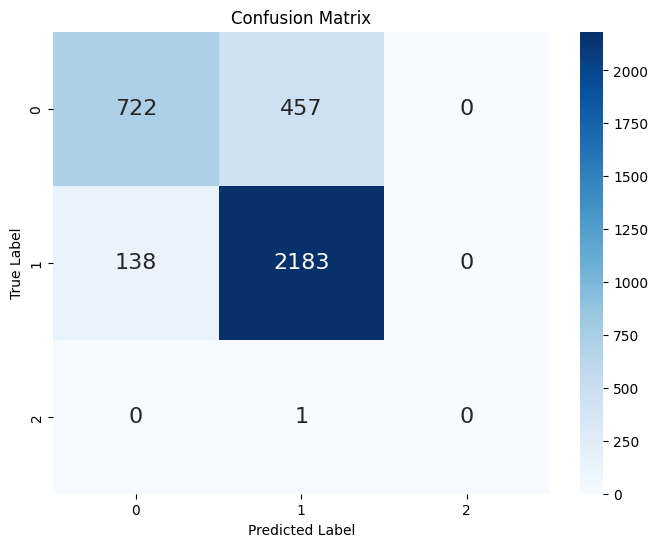

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값을 빈 문자열로 대체하여 오류 해결
main_text['본문'] = main_text['본문'].fillna('')

print('"' + main_text.columns[0] + '"', "기준 점수")

X = main_text['본문']
y = main_text['label']

# 학습데이터 벡터화
vectorizer = TfidfVectorizer(min_df=3, ngram_range=(1, 3))
X_tfidf = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# logisticregresiion 점수
logi_model = LogisticRegression(C=1)
logi_result = cross_val_score(logi_model, X_train, y_train, cv=3)

print("선형회귀모델 점수: ", logi_result)
print("선형회귀모델 평균: ", logi_result.mean())

# 모델 학습 및 예측
logi_model.fit(X_train, y_train)
y_pred = logi_model.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

# Confusion matrix 계산
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix를 히트맵으로 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


"키워드" 기준 점수


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


선형회귀모델 점수:  [0.85004284 0.83004856 0.84147386]
선형회귀모델 평균:  0.8405217556888509
Accuracy: 0.84
Precision: 0.56
Recall: 0.53
F1-score: 0.54


C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


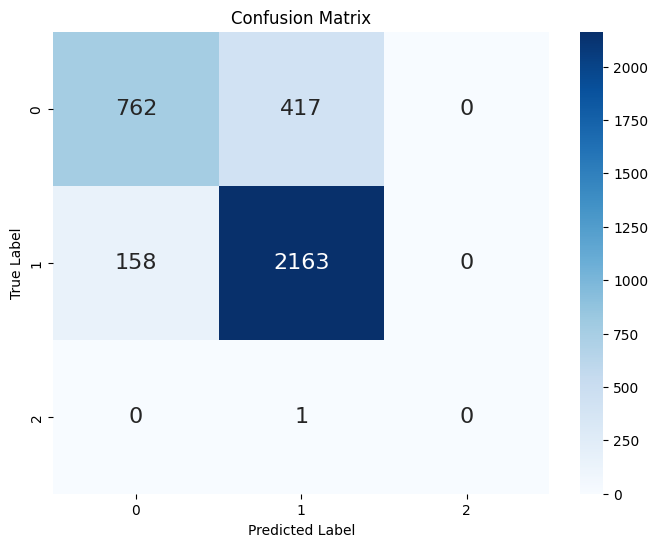

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 키워드기준 

# 결측값을 빈 문자열로 대체하여 오류 해결
keyword['키워드'] = keyword['키워드'].fillna('')


print('"' + keyword.columns[0] + '"', "기준 점수")
vectorizer = TfidfVectorizer()
X = keyword['키워드']
y = keyword['label']

# 학습데이터 벡터화
vectorizer = TfidfVectorizer(min_df=3, ngram_range=(1, 3))
X_tfidf = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# logisticregresiion 점수
logi_model = LogisticRegression(C=1)
logi_result = cross_val_score(logi_model, X_train, y_train, cv=3)

print("선형회귀모델 점수: ", logi_result)
print("선형회귀모델 평균: ", logi_result.mean())

# 모델 학습 및 예측
logi_model.fit(X_train, y_train)
y_pred = logi_model.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

# Confusion matrix 계산
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix를 히트맵으로 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [11]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
X = main_text['본문']
y = main_text['label']
news_pipe_line = Pipeline([
    ('tfidfvectorizer', TfidfVectorizer()),
    ('linearsvc', LinearSVC())
])



In [12]:
param_grid = {
    'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100],

}

In [13]:
grid = GridSearchCV(news_pipe_line, param_grid, cv=3)

In [14]:
grid.fit(X, y)

C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('linearsvc', LinearSVC())]),
             param_grid={'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [113]:
# 첫 번째: 1000, 5000, 10000
print(grid.best_params_, grid.best_score_)

# 0.7084404294384659

{'linearsvc__C': 0.01, 'tfidfvectorizer__max_features': 2000} 0.7117965267506504


In [114]:
# 두 번째: [2000, 4000, 6000]
print(grid.best_params_, grid.best_score_)

{'linearsvc__C': 0.01, 'tfidfvectorizer__max_features': 2000} 0.7117965267506504


In [118]:
# 세 번째: [1000, 2000, 3000]
print(grid.best_params_, grid.best_score_)

{'linearsvc__C': 0.01, 'tfidfvectorizer__max_features': 2000} 0.7117965267506504


In [122]:
# 'tfidfvectorizer__max_features': [1000, 10000, 20000],
print(grid.best_params_, grid.best_score_)

{'linearsvc__C': 0.01, 'tfidfvectorizer__max_features': 10000} 0.7085118537560696


In [126]:
# tfidfvectorizer__max_features': [2000, 7000, 10000]
print(grid.best_params_, grid.best_score_)

{'linearsvc__C': 0.01, 'tfidfvectorizer__max_features': 10000} 0.7085118537560696


In [13]:
#     'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100],
print(grid.best_params_, grid.best_score_)

{'linearsvc__C': 0.001} 0.7082262210796916


In [15]:
# 라벨링 약 12000개 한 이후 
#     'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100],
print(grid.best_params_, grid.best_score_)

{'linearsvc__C': 0.1} 0.6842330762639247


# logistic regression 사용


In [25]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
X = main_text['본문']
y = main_text['label']

news_pipe_line = Pipeline([
    ('tfidfvectorizer', TfidfVectorizer()),
    ('LogisticRegression', LogisticRegression())
])


In [26]:
param_grid = {
    'LogisticRegression__C' : [0.0001, 0.001, 0.01, 1],
}

In [27]:
grid = GridSearchCV(news_pipe_line, param_grid, cv=5, scoring="accuracy")
grid.fit(X, y)

C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\aischool185\anaconda3\envs\machine\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('LogisticRegression',
                                        LogisticRegression())]),
             param_grid={'LogisticRegression__C': [0.0001, 0.001, 0.01, 1]},
             scoring='accuracy')

In [16]:
#     'tfidfvectorizer__max_df' : [10000, 13000, 15000],
#    'tfidfvectorizer__min_df' : [3, 5, 7],
#    'tfidfvectorizer__ngram_range' : [(1, 1), (1, 2), (1, 3), (1, 4)],
#    'LogisticRegression__C' : [0.0001, 0.001, 0.01, 1],
print(grid.best_params_, grid.best_score_)


{'linearsvc__C': 0.001} 0.7082262210796916


3500 + labeling 6500개 --> 총 10000개 일단 나눠서 X_train, X_test, y_train, _y_test 
학습하고나서 --> grid_search하고(원래는 모델 여러가지 써보는게 좋다) --> pickle로 저장하고 --> 나중에 실사용 학습데이터 저장만 해놓고 
무슨 단어사전? X_train vectorizer한거를 pickle로 저장해놔야 한다. 
학습된 모델 --> 불러와서 나중에 내가 쓸 1시간 내 올라온 뉴스에 넣어서 긍정 부정이 나오게 한다. 
linearregression 이 끝난다. 
> 점수 낸거 
정확도 뭐 그런것들.   
4가지 점수가 다있어야 되네.  
정확도는 무조건 높아야 하고, 정밀도나 재현율을 보여주거나 아니면 그거 둘다 한 f1-score  
이진 분류 감성 분석에서 어떤 점수를 가장 많이 쓰는지 보고 그것만 도출  
이 점수   
긍정에 대한 뉴스가 많으면  
학습할 때 긍정을 빡세게 넣어야 함 --> label 1이거 가져와서   
4000 4000 어디다가 모델로 돌려야 한다? 따로 돌려야 한다.   
총 8000개를 가져와서 fit  
그거에 대해서 파라미터 설정하고  
점수 높여서 점수 도출  
모델 저장.   


In [22]:
# 라벨링 12000개 완료 후 gridsearch - keyword
# param_grid = {
#     'tfidfvectorizer__min_df' : [3, 5, 7],
#     'tfidfvectorizer__ngram_range' : [(1, 1), (1, 2), (1, 3), (1, 4)],
#     'LogisticRegression__C' : [0.0001, 0.001, 0.01, 1],
# }
print(grid.best_params_, grid.best_score_)

{'LogisticRegression__C': 1, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 3)} 0.6993001999428735


In [28]:
# 라벨링 12000개 완료 후 gridsearch - 본문 
print(grid.best_params_, grid.best_score_)
param_grid = {
    'LogisticRegression__C' : [0.0001, 0.001, 0.01, 1],
}

{'LogisticRegression__C': 1} 0.6948035905543939


In [29]:
grid.best_estimator_

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(C=1))])